# Disaster Images Dataset (CNN Model)
## Dataset contains almost 4500 images with 4 types of natural elements
*<div style="text-align: right"> **Done by:** <br>
Logesh.V </div>*


---
*`Q1) Write you own code to design the deep neural architecture based on the input from the user. Assume random weights in each layer to compute the output of the hidden layers in the architecture. Print the output of hidden layer given by the user.`*</br>
DATASET: https://www.kaggle.com/mikolajbabula/disaster-images-dataset-cnn-model?select=DisasterModel
---

#### Imports

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

#### Functions

In [2]:
def Dense_lyr(inp,neuron,type='ReLU'):
    if type == 'Sigmoid':
        neuron.out = Sigmoid_fn(np.matmul(neuron.weight,inp) + neuron.bias)
    else:
        neuron.out = ReLU_fn(np.matmul(neuron.weight,inp) + neuron.bias)
    print("Activation =", type)


def Sigmoid_fn(inp):
    return 1/(1+np.power(np.e,-1*inp))

def ReLU_fn(x):
    data = [1 if value>0 else 0 for value in x]
    data = np.array(data, dtype=float)
    data = np.reshape(data,(len(data),1))
    return data

#### Weight Class

In [3]:
class Neuron():
    def __init__(self,inp_dim,out_dim):
        self.weight = np.random.randint(-3,3,size=(out_dim,inp_dim)) # random weight initialized between -3 to 3
        self.bias = np.random.randint(0,2,size=(out_dim,1)) # random bias initialized between 0 to 2
        self.out = np.random.randint(10) # random Output initialized between 1 to 10 integer

#### Initialsing random input and random layers

In [4]:
inp = np.random.randint(10,size=(256,1)) # random input 256x1 no.s ranging from 0 to 10 int
#print("Input:",inp)

# DNN Layer Wize initialization
layer_1 = Neuron(inp.shape[0],128) # maps 256 to 128 neurons
layer_2 = Neuron(128, 64) # maps 128 to 64 neurons
layer_3 = Neuron(64,32) # maps 64 to 32 neurons
layer_4 = Neuron(32,16) # maps 32 to 168 neurons
final_layer = Neuron(16,1) # maps 16 to 1 neurons

#### Passing through the 5 layers

In [5]:
Dense_lyr(inp,layer_1)
Dense_lyr(layer_1.out,layer_2)
Dense_lyr(layer_2.out,layer_3)
Dense_lyr(layer_3.out,layer_4)
Dense_lyr(layer_4.out,final_layer,'Sigmoid')

Activation = ReLU
Activation = ReLU
Activation = ReLU
Activation = ReLU
Activation = Sigmoid


#### Final Output

In [6]:
print("Final probability for (yes-1 or no-0) class output:",final_layer.out[0])

Final probability for (yes-1 or no-0) class output: [0.5]


---
*`Q2) Explore and implement a DNN architecture for the image/signal classification.<br>You are free to explore on any open-source datasets related to signal/image classification.`*

---

In [7]:
# Importing required packages

# then with cv2 we import the image as an array
import os # to navigate through folders and get the image datas
from tqdm import tqdm # to get progress bars while running
import cv2
import numpy as np
import random
import pandas as pd

# We sklearn and skimage to manipulate our image data 
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# keras imports for the dataset and building our neural network
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
#tf.debugging.set_log_device_placement(True)

# We use to plt graphs and images
from matplotlib import pyplot as plt

In [8]:
# Encoding/Decoding the Labels
class_names = ["Cyclone", "Earthquake", "Flood", "Wildfire"]
# We have chosen the Disaster-dataset of 3gb, with 4 classes

# getClasses function is used to get the class value for our class key
def Class_Label(n):
    '''Returns label no. if class name if given and vice versa'''
    
    if ((type(n)==str) and (n in class_names)):
        return class_names.index(n)
    elif ((type(n)==str) and (n in range(len(class_names)))):
        return class_name[n]
    else:
        return -1

In [9]:
# We use the load data function to read our data folders and label each of the images with 
# folder name and append them to a list which is then converted to an array
def Load_Data(datasets, dim):
    '''To import the dataset from the directories and preprocess them'''
        
    # final outputs:
    images=[]
    labels=[]
    
    # iterate through training and test sets
    for dataset in datasets:

        # iterate through folders in each dataset
        for folder in os.listdir(dataset):
            
            label = Class_Label(folder)
            
            # iterate through each image in folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # get pathname of each image
                img_path = os.path.join(os.path.join(dataset, folder), file)
               
                # Open and pre-process it
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # so we are converting to RGB format
                image = resize(image, (dim[0], dim[1]))
                    
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
            print("Loading-Class", label, "-->", folder, "over.")
                
    # Converting the data type of the list
    images = np.array(images, dtype = 'float32') # images in float
    labels = np.array(labels, dtype = 'int32') #labels in integer
    
    # Shuffling the order of data for better accuracy and a good data split
    images,labels=shuffle(images,labels,random_state=random.randint(0, 10))
    return images, labels

In [10]:
# Default Image Size for all data
image_size = (80,80)

# Loading Data - combining all data together for our model
#images, labels = Load_Data(["DisasterModel/test","DisasterModel/train","DisasterModel/validation"],image_size)
images, labels = Load_Data(["DisasterModel/test","DisasterModel/validation"],image_size)
#images, labels = Load_Data(["DisasterModel/Cyclone_Wildfire_Flood_Earthquake_Dataset"],image_size)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:34<00:00,  1.06it/s]


Loading-Class 0 --> Cyclone over.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.25it/s]


Loading-Class 1 --> Earthquake over.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.53it/s]


Loading-Class 2 --> Flood over.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:44<00:00,  1.04s/it]


Loading-Class 3 --> Wildfire over.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.34it/s]


Loading-Class 0 --> Cyclone over.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:25<00:00,  3.93it/s]


Loading-Class 1 --> Earthquake over.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:59<00:00,  1.68it/s]


Loading-Class 2 --> Flood over.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:45<00:00,  1.05s/it]

Loading-Class 3 --> Wildfire over.


In [11]:
NoOfClasses = len(class_names)
print("Size of the Data:", images.shape[1:], "\nTotal No of Data:", images.shape[0])

#no need of normalizing the image as the imput itself is normalized
#imag = image/255 

# Spliting dataset into train, test and validation data
train_images, testX, train_labels, testY = train_test_split(images, labels, test_size=.4)
test_images, val_images, test_labels, val_labels = train_test_split(testX, testY, test_size=.5)

Size of the Data: (80, 80, 3) 
Total No of Data: 800


In [12]:
Ltv = len(val_images)
Lts = len(test_images)
Ltr = len(train_images)
print("\nThe training data is again splited into 2 halfs (Validation and Training):")
print("Size of Validation data: ",Ltv,"\t\tSize of Test data: ",Lts,"\nValidation data is ",round(Ltv*100/(Lts+Ltr+Ltv), 3),"%  of entire dataset.", sep='')


The training data is again splited into 2 halfs (Validation and Training):
Size of Validation data: 160		Size of Test data: 160
Validation data is 20.0%  of entire dataset.


### Data Analysis

In [13]:
# To view the data information we have obtained so far
print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_images.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Training images are of shape: (480, 80, 80, 3)
Training labels are of shape: (480,)
Validation images are of shape: (160, 80, 80, 3)
Validation labels are of shape: (160,)
Test images are of shape: (160, 80, 80, 3)
Test labels are of shape: (160,)


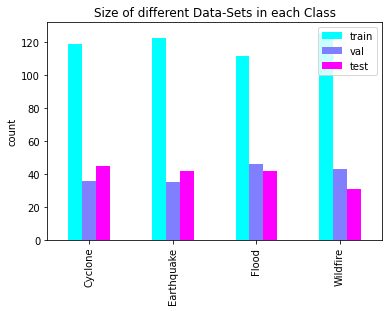

In [14]:
# ploting unique counts of train, test, validation data sets of each class
_, train_counts = np.unique(train_labels, return_counts = True)
_, val_counts = np.unique(val_labels, return_counts = True)
_, test_counts = np.unique(test_labels, return_counts = True)

pd.DataFrame({'train': train_counts, "val": val_counts, "test": test_counts}, index = class_names).plot.bar(title='Size of different Data-Sets in each Class',ylabel='count',cmap='cool')

plt.show()

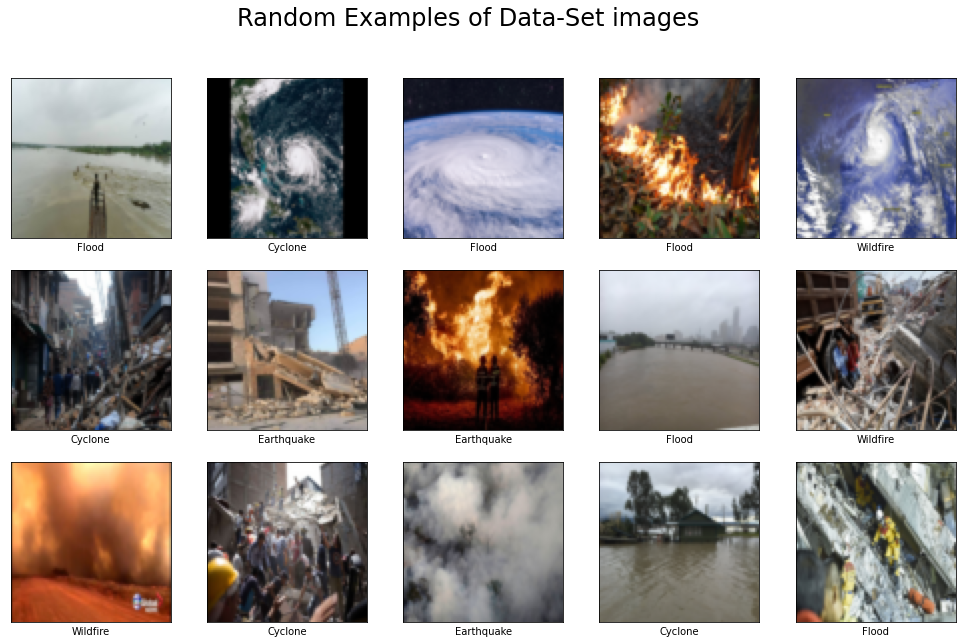

In [15]:
def dis_rand_exp(class_names, images, labels, x=3, y=5):
    fig = plt.figure(figsize = (17,10))
    fig.suptitle("Random Examples of Data-Set images", fontsize=24)
    for i in range(x*y):
        plt.subplot(x,y,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[random.randint(0,len(images))])
        plt.xlabel(class_names[labels[i]])
    plt.show()
    
dis_rand_exp(class_names, train_images, train_labels)

### Encoding labels
One-hot encoding can be applied to the label integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [16]:
n_classes = len(class_names)
# one-hot encoding using keras' numpy-related utilities
print("Shape before one-hot encoding: (Training) ", train_labels.shape)
train_labels0 = np_utils.to_categorical(train_labels, n_classes)
test_labels0 = np_utils.to_categorical(test_labels, n_classes)
val_labels0 = np_utils.to_categorical(val_labels, n_classes)
print("Shape after one-hot encoding: (Training) ", train_labels0.shape)

Shape before one-hot encoding: (Training)  (480,)
Shape after one-hot encoding: (Training)  (480, 4)


### Building our custom model

In [17]:
model=keras.models.Sequential([
    
    # Only one Conv block kernel size
    keras.layers.Conv2D(64, (9,9), activation = 'relu', padding = 'same', input_shape = (image_size[0],image_size[1],3)),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.05),
        
    
    # FC layer 
    keras.layers.Flatten(),
    keras.layers.Dropout(.3),
    
    # Main DNN architechture:
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dropout(.1),
    # Output layer
    keras.layers.Dense(4,activation='softmax')   
])

# Compile
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

### Model summary

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 64)        15616     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 40, 40, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 40, 40, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 102400)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 102400)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1

### Training the model

In [19]:
epochs = 30

history = model.fit(train_images,
                    train_labels0,
                    epochs=epochs,
                    #steps_per_epoch=100, # reduced no.of steps per epoch
                    batch_size=32, # default batch size is 32, low for reduced gpu memory
                    validation_data=(val_images,val_labels0))

Epoch 1/30
15/15 [==============================] - 3s 53ms/step - loss: 2.3370 - accuracy: 0.3833 - val_loss: 1.8169 - val_accuracy: 0.2750
Epoch 2/30
15/15 [==============================] - 1s 40ms/step - loss: 1.2230 - accuracy: 0.5167 - val_loss: 1.7980 - val_accuracy: 0.3688
Epoch 3/30
15/15 [==============================] - 1s 40ms/step - loss: 1.0295 - accuracy: 0.5604 - val_loss: 1.5439 - val_accuracy: 0.4000
Epoch 4/30
15/15 [==============================] - 1s 40ms/step - loss: 0.9056 - accuracy: 0.5604 - val_loss: 1.1740 - val_accuracy: 0.4125
Epoch 5/30
15/15 [==============================] - 1s 40ms/step - loss: 0.7677 - accuracy: 0.6167 - val_loss: 1.0911 - val_accuracy: 0.4437
Epoch 6/30
15/15 [==============================] - 1s 40ms/step - loss: 0.8350 - accuracy: 0.6083 - val_loss: 1.1313 - val_accuracy: 0.5125
Epoch 7/30
15/15 [==============================] - 1s 41ms/step - loss: 0.7474 - accuracy: 0.6667 - val_loss: 1.1414 - val_accuracy: 0.5188
Epoch 8/30
15

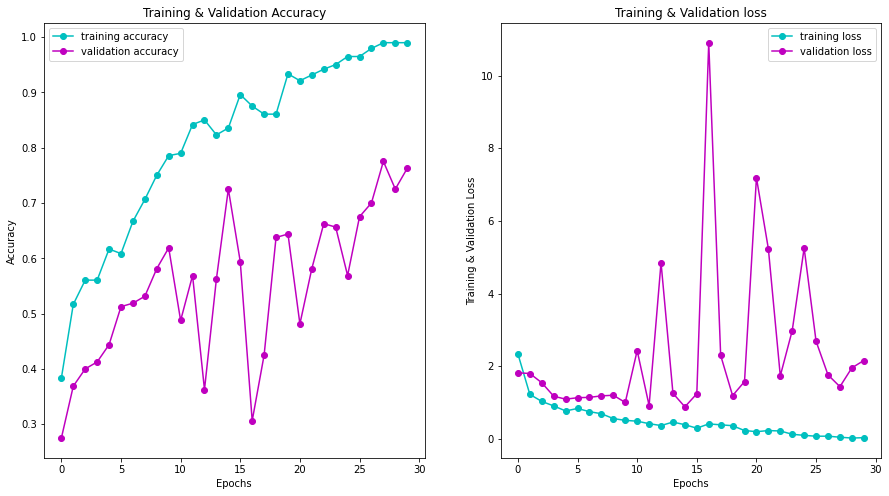

In [20]:
def plot_accuracy_and_loss_of_train_and_validation_dataset(history):
    epoch=[i for i in range(epochs)]
    train_acc=history.history['accuracy']
    train_loss=history.history['loss']
    val_acc=history.history['val_accuracy']
    val_loss=history.history['val_loss']
    fig , ax=plt.subplots(1,2)
    fig.set_size_inches(15,8)
    ax[0].plot(epoch,train_acc,'co-',label='training accuracy')
    ax[0].plot(epoch,val_acc,'mo-',label='validation accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[1].plot(epoch,train_loss,'c-o',label='training loss')
    ax[1].plot(epoch,val_loss,'m-o',label='validation loss')
    ax[1].set_title('Training & Validation loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")

plot_accuracy_and_loss_of_train_and_validation_dataset(history)

In [21]:
loss,accuracy = model.evaluate(test_images,test_labels0)
#loss,accuracy = model.evaluate(test_images,test_labels)
print("the accuracy of test image is : ",accuracy)

5/5 [==============================] - 0s 8ms/step - loss: 3.8940 - accuracy: 0.6625
the accuracy of test image is :  0.6625000238418579


### Accuracy for each class

In [22]:
print("Predicting Test Images using the above Trained model...")
pred_Ids_of_test = model.predict(test_images)

Predicting Test Images using the above Trained model...


In [23]:
predIdxs = np.argmax(pred_Ids_of_test, axis=1) # to get the indices of max value in each row
print(classification_report(test_labels, predIdxs,target_names=class_names))

              precision    recall  f1-score   support

     Cyclone       0.93      0.56      0.69        45
  Earthquake       0.56      0.83      0.67        42
       Flood       0.80      0.38      0.52        42
    Wildfire       0.60      0.97      0.74        31

    accuracy                           0.66       160
   macro avg       0.72      0.68      0.65       160
weighted avg       0.73      0.66      0.65       160



### Confusion Matrix

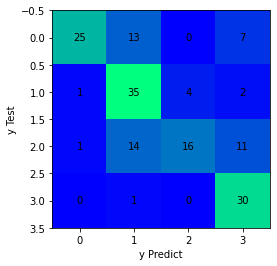

In [24]:
CM = confusion_matrix(test_labels, predIdxs)
# Plot confusion matrix
plt.imshow(CM,interpolation='nearest',cmap='winter')
for (i, j), z in np.ndenumerate(CM):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("y Predict")
plt.ylabel("y Test")
plt.grid(False)
plt.show()

---
#### *<div style="text-align: center"> - - - - - Thank You - - - - - <div>*
---